# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### Convert CancellationCode, Dest, Origin and UniqueCarrier columns to categorical data type to reduce memory foot print.

In [2]:
flights_data = pd.read_csv("flights_data.csv")

/Users/command/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
#Make all column names lower case
default_cols = list(flights_data.columns)
lower_colnames = [name.lower() for name in default_cols]
flights_data.columns = lower_colnames

In [20]:
flights_data.columns

Index(['unnamed: 0', 'unnamed: 0.1', 'year', 'month', 'dayofmonth',
       'dayofweek', 'deptime', 'crsdeptime', 'arrtime', 'crsarrtime',
       'uniquecarrier', 'flightnum', 'tailnum', 'actualelapsedtime',
       'crselapsedtime', 'airtime', 'arrdelay', 'depdelay', 'origin', 'dest',
       'distance', 'taxiin', 'taxiout', 'cancelled', 'cancellationcode',
       'diverted', 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay',
       'lateaircraftdelay'],
      dtype='object')

In [10]:
flights_data["cancellationCode"] = flights_data.cancellationCode.astype('category')
flights_data["dest"] = flights_data.dest.astype('category')
flights_data["origin"] = flights_data.origin.astype('category')
flights_data["uniquecarrier"] = flights_data.UniqueCarrier.astype('category')

In [ ]:
#Converting to date time dtyps
def convert_to_datetime(data):
    if data.isnan():
        return data
    else:
        replaced_string = str(data).replace(".0", "")
        if(len(replaced_string) < 4):
            return replaced_string.zfill(4)
        else:
            if replaced_string == "2400":
                return "0000"
            else:
                return replaced_string
flights_data["dep_time"] = flights_data["DepTime"]

In [11]:
#flights_data["DepTime"] = flights_data.DepTime.astype(str).str.pad(width=6, side="left", fillchar="0")
# pd.to_datetime(flights_data["DepTime"].astype(str), format="%H%M.0")
flights_data.info(null_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123534969 entries, 0 to 123534968
Data columns (total 31 columns):
Unnamed: 0           123534969 non-null int64
Unnamed: 0.1         123534969 non-null int64
Year                 123534969 non-null int64
Month                123534969 non-null int64
DayofMonth           123534969 non-null int64
DayOfWeek            123534969 non-null int64
DepTime              121232833 non-null float64
CRSDepTime           123534969 non-null int64
ArrTime              120950491 non-null float64
CRSArrTime           123534969 non-null int64
UniqueCarrier        123534969 non-null category
FlightNum            123534969 non-null int64
TailNum              86149549 non-null object
ActualElapsedTime    120947440 non-null float64
CRSElapsedTime       123508735 non-null float64
AirTime              84268571 non-null float64
ArrDelay             120947440 non-null float64
DepDelay             121232833 non-null float64
Origin               123534969 non-null

In [12]:
flights_data.dtypes

Unnamed: 0              int64
Unnamed: 0.1            int64
Year                    int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
DepTime               float64
CRSDepTime              int64
ArrTime               float64
CRSArrTime              int64
UniqueCarrier        category
FlightNum               int64
TailNum                object
ActualElapsedTime     float64
CRSElapsedTime        float64
AirTime               float64
ArrDelay              float64
DepDelay              float64
Origin               category
Dest                 category
Distance              float64
TaxiIn                float64
TaxiOut               float64
Cancelled               int64
CancellationCode     category
Diverted                int64
CarrierDelay          float64
WeatherDelay          float64
NASDelay              float64
SecurityDelay         float64
LateAircraftDelay     float64
dtype: object

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

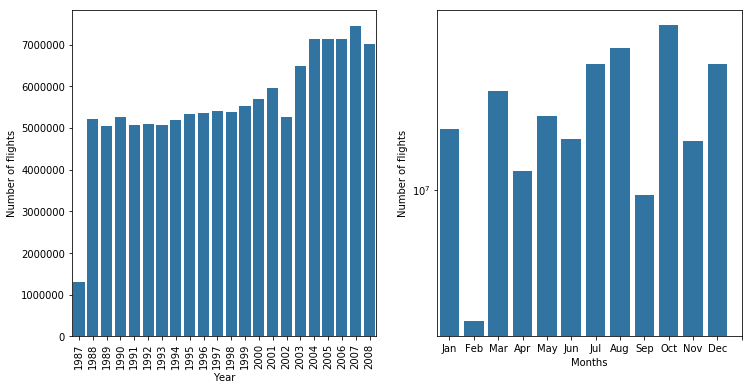

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.countplot(data=flights_data,x="Year", color=sb.color_palette()[0])
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Number of flights")
plt.subplot(1,2,2)
sb.countplot(data=flights_data, x="Month", color=sb.color_palette()[0])
y_ticks = [10, 100, 1000, 10000, 100000]
plt.yticks(y_ticks, y_ticks)
months_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months_ticks = np.arange(0, 13, 1)
plt.xticks(months_ticks, months_labels)
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.yscale("log")


Number of flights are increasing by each year. In the year 1987, there seems to be a very small number of flights comparitively. This needs to looked into much deeper

There seems to be very few flights in Februaries that needs to be looked into further. Other than There seems to be a large number of flights in December, October and August.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ce0a47cc0>,
      dtype=object)

<Figure size 864x504 with 0 Axes>

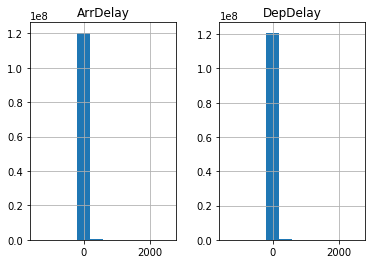

In [6]:
plt.figure(figsize=(12,7))
flights_data[["ArrDelay", "DepDelay"]].hist()


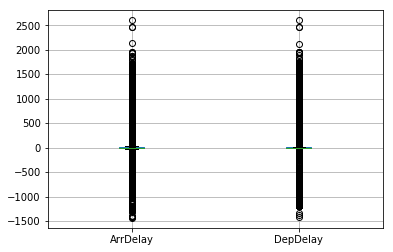

In [7]:
flights_data.boxplot(column=["ArrDelay", "DepDelay"])

There appear to be a lot of outliers in arrival and departure delays

Text(0, 0.5, 'Number of flights')

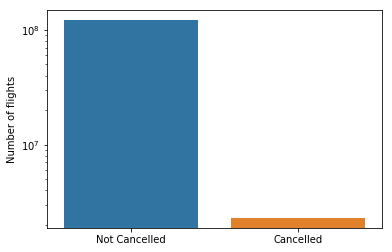

In [8]:
# cancelled_flights = flights_data.query("Cancelled == 0")["CancellationCode"]
sb.countplot(data=flights_data, x="Cancelled")
plt.yscale("log")
plt.xticks([0,1], ["Not Cancelled", "Cancelled"])
plt.xlabel("")
plt.ylabel("Number of flights")

Text(0, 0.5, 'Number of flights')

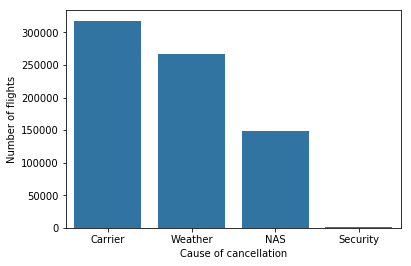

In [9]:

cancel_order = flights_data.CancellationCode.value_counts().index
sb.countplot(data=flights_data, x="CancellationCode", order=cancel_order, color=sb.color_palette()[0])
cancelCode_xticks = np.arange(0,4,1)
cancelCode_xticklabels = ["Carrier", "Weather", "NAS", "Security"]
plt.xticks(cancelCode_xticks, cancelCode_xticklabels)
plt.xlabel("Cause of cancellation")
plt.ylabel("Number of flights")

It seems like a large number of the flights were cancelled due to carrier and weather wherase only a very few was cancelled due to security issues.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!